# Part II - Loan Prosper Exploration
## by Truong Quang Minh Tu


## Investigation and Dataset Overview

The dataset contains 113937 loans with 81 variables corresponding to each loan including loan amount, payment, interest rate. Most of the columns are numeric data (indicate loan, interest, fee amount...), categorical data (Occupation, Loan Status...) and ordinal data (CreditGrade, LoanStatus...).

The main features of interest in the dataset is to find out what variables highly correlate with the 2 followings: 
- The amount prosper loan 
- The amount proper loan loss - The principal that remains uncollected after any recoveries.

The features will help support support my investigation is Prosper Loan Amount and the Prosper Loss Net, which are also the feature of interest. In order to make an investigation, the both could be explained by the other variables.


In [133]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [134]:
# load in the dataset into a pandas dataframe
data = pd.read_csv(r'C:\Users\DE\Desktop\Data visualization_Udacity\prosperLoanData.csv')

## Visualization 1: Relationship between Prosper Rating, Borrower Rate and Loan Term

Question: 
- Which term observes the biggest amount of loan prosper?
- Which term observes the biggest amount of loan proper principal outstanding?

<br> This visualization also support the key finding that the 3 variables have a positive relationship with the Loan Prosper Principal Outstanding as these three are higher in value, the Principal Outstanding will be higher. </br>

<br> The purpose of this visualization is to support the hypothesis that at the longer term, the principal amount of prosper loan would be larger, due to the longer term, we also want to involve the borrower rate, which is the key factor in loan long term category, the borrower rate will be more favorable to support the lender. </br>


We can see that in the proper rating = 7, the borrower rate would be lower, expecially in the term = 60. This finding supports the hypothesis above explained why the prosper principal outstanding would be the largest in the term = 60.

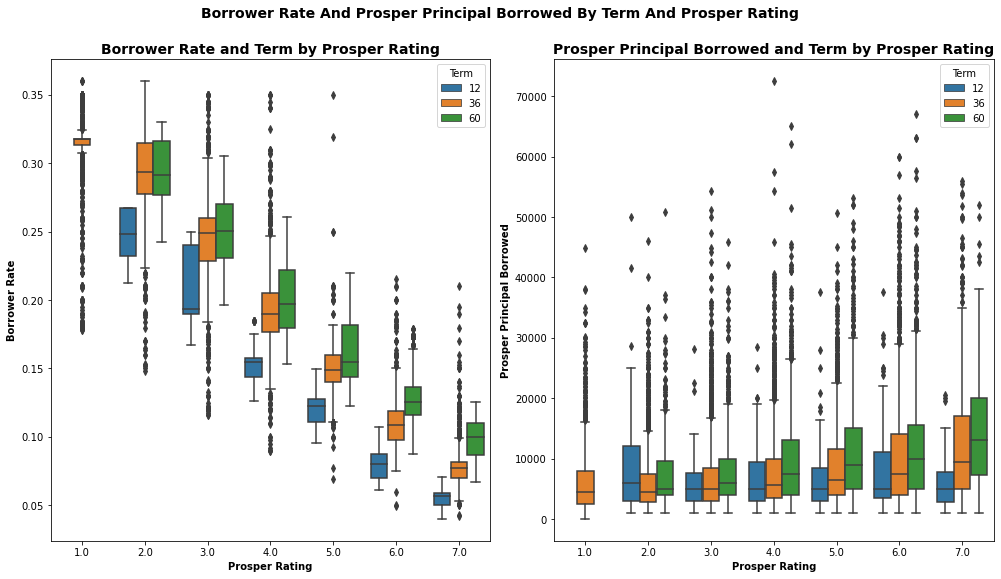

In [135]:
plt.figure(figsize=[14, 8])
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

g1 = sb.boxplot(data=data, x='ProsperRating (numeric)', y='BorrowerRate', hue='Term', ax=ax1)
g2 = sb.boxplot(data=data, x='ProsperRating (numeric)', y='ProsperPrincipalBorrowed', hue='Term', ax=ax2)

# Ax1 set up    
# Add title and format it
ax1.set_title('Borrower Rate and Term by Prosper Rating', fontsize = 14, weight = "bold")
# Add x label and format it
ax1.set_xlabel('Prosper Rating'.title(), fontsize = 10, weight = "bold")
# Add y label and format it
ax1.set_ylabel('Borrower Rate'.title(), fontsize = 10, weight = "bold")


# Add title and format it
ax2.set_title('Prosper Principal Borrowed and Term by Prosper Rating', fontsize = 14, weight = "bold")
# Add x label and format it
ax2.set_xlabel('Prosper Rating'.title(), fontsize = 10, weight = "bold")
# Add y label and format it
ax2.set_ylabel('Prosper Principal Borrowed'.title(), fontsize = 10, weight = "bold")


# general setting
# If a visualisation has subplots, add a MAIN title
plt.suptitle("Borrower Rate and Prosper Principal Borrowed by Term and Prosper Rating".title(), y = 1, fontsize = 14, weight = "bold")

# Optimize distance between subplots
plt.tight_layout()





Across the Prosper rate, when comparing the median, the term = 60 observes the most favorable rate and contains loan with higher amount.
As the larger amount in principal amount (regardless of which prosper rating), the loan amount would be higher in the term = 60 and corresponding with the favorable interest rate.


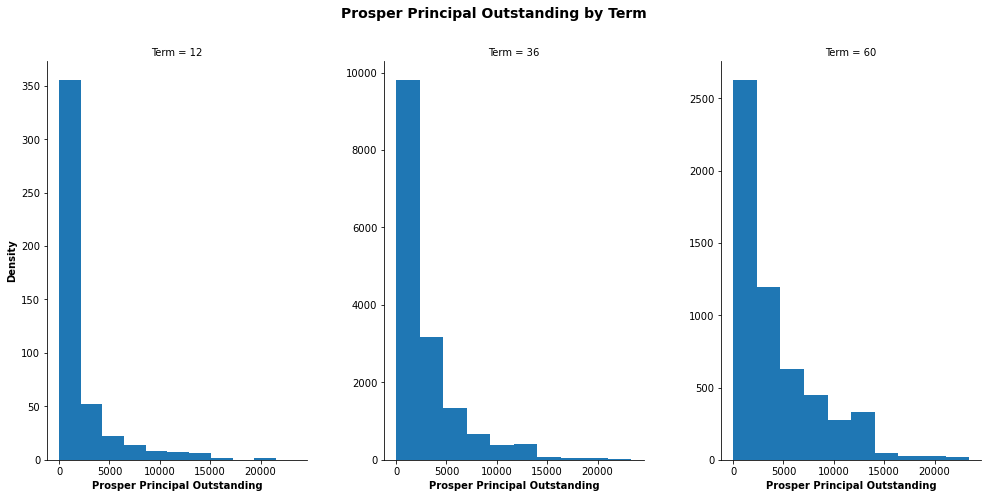

In [136]:
g = sb.FacetGrid(data = data, col = 'Term', col_wrap=3, sharey=False)
g.map(plt.hist, 'ProsperPrincipalOutstanding');
g.fig.set_size_inches(14, 8);

g.set_xlabels('Prosper Principal Outstanding', fontsize = 10, weight = "bold");
g.set_ylabels('Density', fontsize = 10, weight = "bold");


# Add main title
plt.suptitle('Prosper Principal Outstanding by Term', fontsize = 14, weight = "bold");


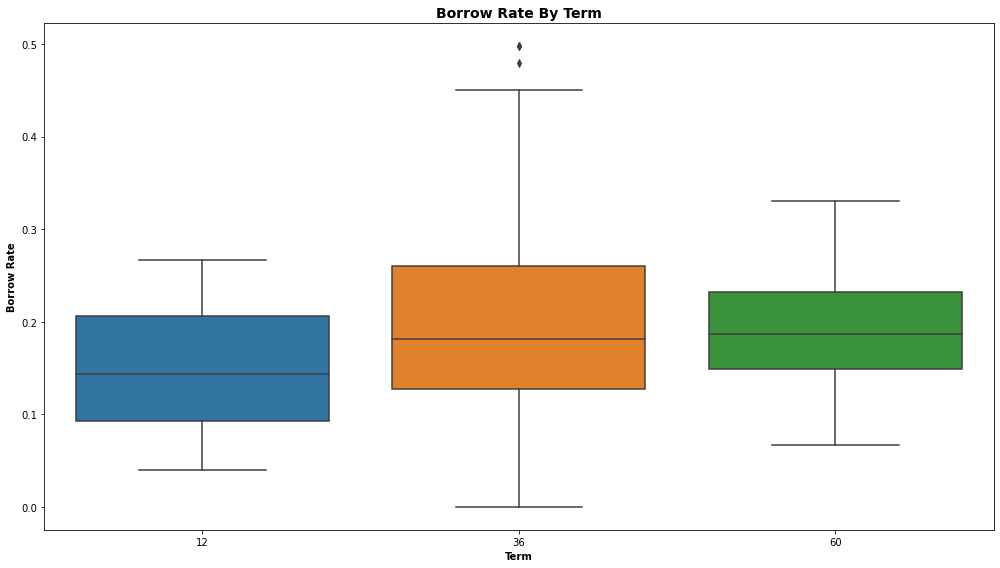

In [137]:
plt.figure(figsize=[14, 8]);
sb.boxplot(data=data, y ='BorrowerRate', x='Term');

# Add title and format it
plt.title('Borrow Rate by Term'.title(), fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Term'.title(), fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Borrow Rate'.title(), fontsize = 10, weight = "bold");

#Optimize distance between subplots
plt.tight_layout();

The Borrower Rate will be more favorable for loan long term 

## Visualization 2: Net Loss on Prosper Loan distribution.

Question: Could the loss on Prosper Loan distribution be offsetted by the recoveries?

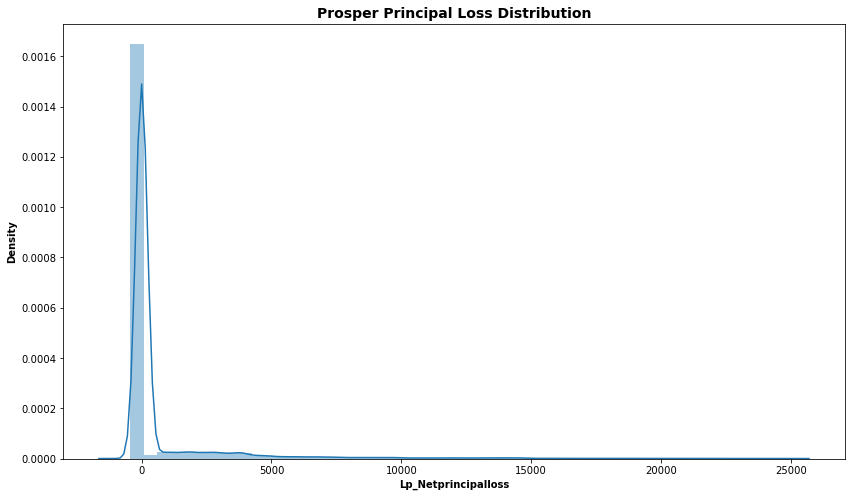

In [138]:
# Prove Prosper Score as Normal distribution
plt.figure(figsize=[14, 8])
sb.distplot(data['LP_NetPrincipalLoss'].loc[data['LP_NetPrincipalLoss'].isnull() == False], kde=True);

# Add title
plt.title('Prosper Principal Loss Distribution', fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('LP_NetPrincipalLoss'.title(), fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Density'.title(), fontsize = 10, weight = "bold");

- The Net Loss on Prosper Loan has its mean = 0 then the recoveries (negative Net Loss on Prosper Loan) could set off the charged off loans which are loss (positive Net Loss on Prosper Loan).

## Visualization 3: listing category = 20 (20 - Wedding Loans) observes the largest loan prosper amount 

Question: 
- Out of the listing, which category observes the largest Prosper Principal Outstanding?


Out of the listing category, the listing category = 20 (1 - Wedding ) is the category that observes the most loan amount in the range 0-10000.

The median for loan prosper outstanding across all categories are all in the range 0-5000, in which, listing category = 16 - Motorcycle has its smallest median and listing category = 20 - Wedding Loans seems to be the largest median.

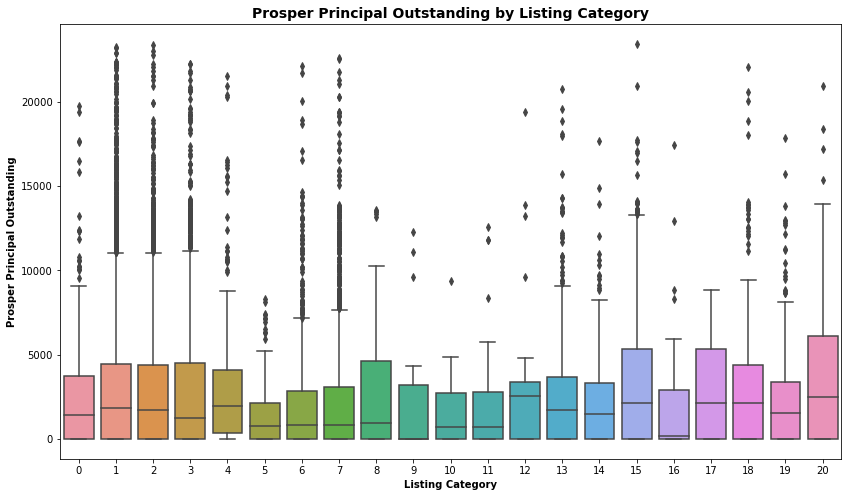

In [139]:
plt.figure(figsize=[14, 8]);
sb.boxplot(data=data, x='ListingCategory (numeric)', y='ProsperPrincipalOutstanding');

# Add title
plt.title('Prosper Principal Outstanding by Listing Category', fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Listing Category'.title(), fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel('Prosper Principal Outstanding'.title(), fontsize = 10, weight = "bold");

### Generate Slideshow


In [140]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 775257 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\Users\DE\Anaconda3\envs\data_wrangling\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\Users\DE\Anaconda3\envs\data_wrangling\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\DE\Anaconda3\envs\data_wrangling\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\DE\AppData\Roaming\Python\Python37\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\DE\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "c:\Users\DE\Anac

In [141]:
# conver to pdf
from nb_offline_convert import OfflineHTMLExporter, OfflineWebPDFExporter

# convert to html
html_converter = OfflineHTMLExporter()
content, _ = html_converter.from_filename('Part_II_slide_deck_template.ipynb')
with open(r"Part_II_slide_deck_template.html", "w", encoding = 'utf-8') as f:
    f.write(content)